# Lab assignment №1, part 2

This lab assignment consists of several parts. You are supposed to make some transformations, train some models, estimate the quality of the models and explain your results.

Several comments:
* Don't hesitate to ask questions, it's a good practice.
* No private/public sharing, please. The copied assignments will be graded with 0 points.
* Blocks of this lab will be graded separately.

__*This is the second part of the assignment. First and third parts are waiting for you in the same directory.*__

## Part 2. Data preprocessing, model training and evaluation.

### 1. Reading the data
Today we work with the [dataset](https://archive.ics.uci.edu/ml/datasets/Statlog+%28Vehicle+Silhouettes%29), describing different cars for multiclass ($k=4$) classification problem. The data is available below.

In [1]:
# If on colab, uncomment the following lines

# ! wget https://raw.githubusercontent.com/girafe-ai/ml-course/22f_made/homeworks/lab01_ml_pipeline/car_data.csv

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

dataset = pd.read_csv('car_data.csv', delimiter=',', header=None).values
data = dataset[:, :-1].astype(int)
target = dataset[:, -1]

print(data.shape, target.shape)

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.35)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(846, 19) (846,)
(549, 19) (549,) (297, 19) (297,)


To get some insights about the dataset, `pandas` might be used. The `train` part is transformed to `pd.DataFrame` below.

In [3]:
X_train_pd = pd.DataFrame(X_train)

# First 15 rows of our dataset.
X_train_pd.head(15)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,495,94,45,72,179,69,6,156,41,19,144,181,373,191,69,5,5,193,198
1,224,86,41,66,133,56,6,136,49,18,136,155,274,162,74,5,14,183,189
2,671,103,41,83,194,63,9,175,38,21,142,199,455,138,65,7,30,197,206
3,638,97,49,76,203,73,7,178,36,21,157,194,487,186,72,0,7,197,200
4,136,86,48,75,136,58,10,161,43,20,163,170,371,185,75,3,1,183,192
5,514,89,38,74,138,59,7,136,49,18,133,167,278,128,72,7,7,189,193
6,431,99,47,91,226,74,5,202,32,23,148,234,629,186,79,4,11,192,191
7,421,98,48,101,195,61,11,207,31,23,152,227,650,193,71,5,7,189,196
8,464,100,49,80,206,70,6,183,35,21,156,206,517,198,73,3,13,198,199
9,225,93,41,79,159,63,8,144,46,19,150,165,309,134,67,4,9,195,203


Methods `describe` and `info` deliver some useful information.

In [4]:
X_train_pd.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
count,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000
mean,424.642987,94.058288,45.145719,82.897996,171.258652,62.010929,8.683060,170.571949,40.573770,20.721311,148.530055,190.635701,449.663024,176.080146,72.482696,6.466302,12.810565,188.976321,195.748634
std,250.823520,8.419231,6.300611,16.225615,34.661009,8.390333,5.118104,34.212208,8.026901,2.657574,14.786976,32.734587,181.906884,33.234142,7.730767,5.022327,8.939405,6.063335,7.383809
min,0.000000,77.000000,33.000000,40.000000,109.000000,47.000000,2.000000,112.000000,26.000000,17.000000,119.000000,130.000000,184.000000,112.000000,59.000000,0.000000,0.000000,176.000000,181.000000
25%,206.000000,87.000000,40.000000,70.000000,141.000000,57.000000,6.000000,147.000000,33.000000,19.000000,137.000000,168.000000,319.000000,149.000000,67.000000,2.000000,6.000000,185.000000,191.000000
50%,427.000000,93.000000,45.000000,81.000000,172.000000,61.000000,8.000000,158.000000,42.000000,20.000000,147.000000,182.000000,368.000000,174.000000,71.000000,6.000000,11.000000,189.000000,197.000000
75%,645.000000,100.000000,51.000000,100.000000,197.000000,65.000000,10.000000,201.000000,46.000000,23.000000,160.000000,219.000000,611.000000,200.000000,75.000000,9.000000,19.000000,193.000000,201.000000
max,845.000000,117.000000,59.000000,112.000000,333.000000,138.000000,55.000000,265.000000,61.000000,29.000000,188.000000,320.000000,1018.000000,268.000000,135.000000,22.000000,41.000000,206.000000,211.000000


In [5]:
X_train_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 549 entries, 0 to 548
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       549 non-null    int64
 1   1       549 non-null    int64
 2   2       549 non-null    int64
 3   3       549 non-null    int64
 4   4       549 non-null    int64
 5   5       549 non-null    int64
 6   6       549 non-null    int64
 7   7       549 non-null    int64
 8   8       549 non-null    int64
 9   9       549 non-null    int64
 10  10      549 non-null    int64
 11  11      549 non-null    int64
 12  12      549 non-null    int64
 13  13      549 non-null    int64
 14  14      549 non-null    int64
 15  15      549 non-null    int64
 16  16      549 non-null    int64
 17  17      549 non-null    int64
 18  18      549 non-null    int64
dtypes: int64(19)
memory usage: 81.6 KB


### 2. Machine Learning pipeline
Here you are supposed to perform the desired transformations. Please, explain your results briefly after each task.

#### 2.0. Data preprocessing
* Make some transformations of the dataset (if necessary). Briefly explain the transformations

In [6]:
### YOUR CODE HERE

In [7]:
from collections import Counter

Посмотрим на баланс классов:

In [8]:
Counter(y_train)

Counter({'bus': 135, 'saab': 145, 'opel': 151, 'van': 118})

In [9]:
from sklearn.preprocessing import StandardScaler    

In [10]:
scaler = StandardScaler()
X_train_norm = scaler.fit_transform(X_train)

#### 2.1. Basic logistic regression
* Find optimal hyperparameters for logistic regression with cross-validation on the `train` data (small grid/random search is enough, no need to find the *best* parameters).

* Estimate the model quality with `f1` and `accuracy` scores.
* Plot a ROC-curve for the trained model. For the multiclass case you might use `scikitplot` library (e.g. `scikitplot.metrics.plot_roc(test_labels, predicted_proba)`).

*Note: please, use the following hyperparameters for logistic regression: `multi_class='multinomial'`, `solver='saga'` `tol=1e-3` and ` max_iter=500`.*

In [12]:
### YOUR CODE HERE

In [55]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, plot_roc_curve

In [51]:
def get_best_model(X, y, model, params, cv=5, info=''):
    gs_model = GridSearchCV(model, param_grid=params, cv=cv, )
    gs_model.fit(X, y)

    best_model = gs_model.best_estimator_
    best_score = gs_model.best_score_
    
    print(f'Best {info} train score: {best_model}')
    print(f'Best {info} train estimator: {best_score}\n')
    return best_model, best_score

In [52]:
def test_model(model, X, y, info=''):
    y_pred = model.predict(X)
    y_pred_proba = model.predict_proba(X)
    
    f1 = round(f1_score(y, y_pred, average='macro') ,3)
    acc = round(accuracy_score(y, y_pred), 3)
    
    print(f'F1 score {info} : {f1}')
    print(f'Accuracy score {info} : {acc}\n')
    return f1, acc

In [ ]:
get_best_model(X, y, model, params, cv=5, info='')

In [15]:
cv = 5
C_params = {'C': np.logspace(0, 3, num=10)}
logreg = LogisticRegression(solver='saga', tol=1e-3, max_iter=500, multi_class='multinomial')

gs_norm = GridSearchCV(logreg, C_params, cv=cv)
gs_norm.fit(X_train_norm, y_train)

print(gs_norm.best_score_)
print(gs_norm.best_estimator_)
logreg_norm = gs_norm.best_estimator_

0.7760133444537114
LogisticRegression(C=21.544346900318832, max_iter=500,
                   multi_class='multinomial', solver='saga', tol=0.001)


In [16]:
X_test_norm = scaler.transform(X_test)
y_pred = logreg_norm.predict(X_test_norm)
y_pred_proba = logreg_norm.predict_proba(X_test_norm)

f1_norm_res = np.round(f1_score(y_pred, y_test, average='macro'), 3)
acc_norm_res = np.round(accuracy_score(y_pred, y_test), 3)

print(f'f1-score on normalized data: {f1_norm_res}')
print(f'Accuracy-score on normalized data: {acc_norm_res}')


f1-score on normalized data: 0.799
Accuracy-score on normalized data: 0.815


In [17]:
import scikitplot

<AxesSubplot:title={'center':'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

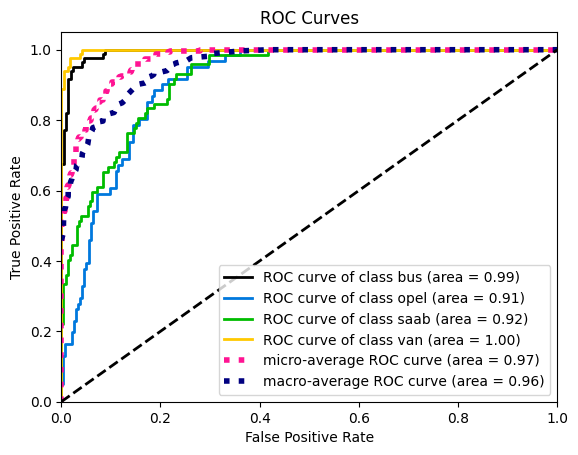

In [18]:
scikitplot.metrics.plot_roc(y_test, y_pred_proba)

In [19]:
# You might use this command to install scikit-plot. 
# Warning, if you a running locally, don't call pip from within jupyter, call it from terminal in the corresponding 
# virtual environment instead

# ! pip install scikit-plot

#### 2.2. PCA: explained variance plot
* Apply the PCA to the train part of the data. Build the explaided variance plot. 

In [20]:
from sklearn.decomposition import PCA

In [21]:
from matplotlib import pyplot as plt

In [22]:
def plot_pca_var(data):
    pca_transformer = PCA()
    pca_transformer.fit(data)
    pca_vars = pca_transformer.explained_variance_ratio_ * 100
    cum_vars = np.cumsum(pca_vars)
    
    plt.bar(np.arange(len(pca_vars)), pca_vars)
    plt.plot(np.arange(len(pca_vars)), cum_vars, color='green', marker='o', linestyle='dashed')
    plt.hlines(y=90, xmin=0, xmax=18, color='red')

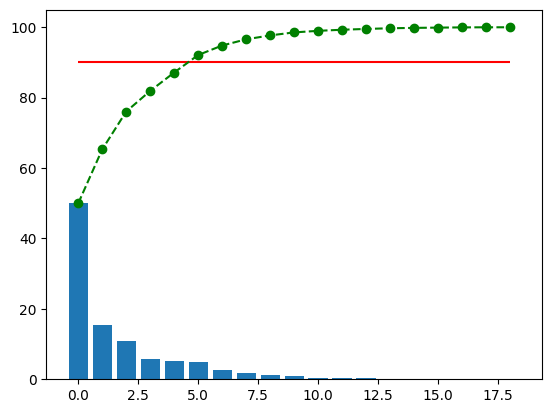

In [23]:
plot_pca_var(X_train_norm)

#### 2.3. PCA trasformation
* Select the appropriate number of components. Briefly explain your choice. Should you normalize the data?

*Use `fit` and `transform` methods to transform the `train` and `test` parts.*

Я в начале хотел взять 6 компонент, чтобы сохранить 90%, но потом получил качество accuarcy=0.44, поэтому переиграем и возьмем 11

In [24]:
### YOUR CODE HERE
pca_transformer = PCA()
pca_transformer.fit(X_train_norm)
pca_vars = pca_transformer.explained_variance_ratio_ * 100
cum_vars = np.cumsum(pca_vars)
num_components = np.argwhere(cum_vars > 99).min() + 1
print(num_components)

12


In [25]:
from sklearn.pipeline import Pipeline

In [26]:
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=num_components))])

In [27]:
X_train_pca = pipe.fit_transform(X_train)
X_test_pca = pipe.transform(X_test)
print(f'X train shape: {X_train_pca.shape}')
print(f'X test shape: {X_test_pca.shape}')

X train shape: (549, 12)
X test shape: (297, 12)


### Should you normalize the data?

Как будет выглядеть график, если не нормализовать признаки

In [28]:
cov = X_train_pd.cov()

(array([17.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  1.]),
 array([7.06270193e+00, 6.29760023e+03, 1.25881378e+04, 1.88786753e+04,
        2.51692128e+04, 3.14597504e+04, 3.77502879e+04, 4.40408254e+04,
        5.03313629e+04, 5.66219005e+04, 6.29124380e+04]),
 <BarContainer object of 10 artists>)

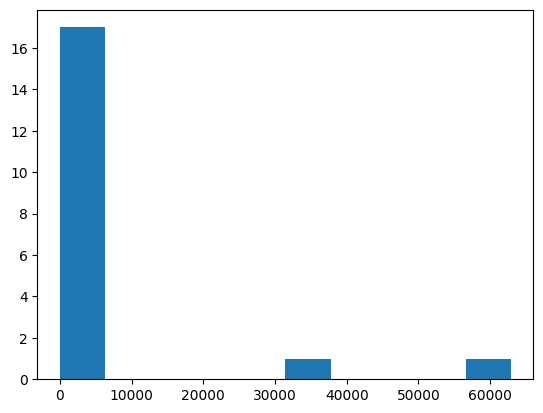

In [29]:
plt.hist(np.diag(cov))

 Видим, что ковариация принимает аномально большие значения в двух признаках, PCA выгодно обращать на них внимание, ибо на них изначально самая большая "неустойчивость".
Разложение на компоненты на рисунке ниже подтверждает предположение.

Перед PCA нужно проводить нормализацию

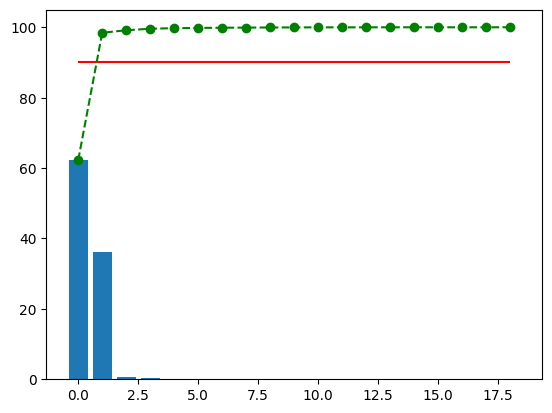

In [30]:
plot_pca_var(X_train)

**Note: From this point `sklearn` [Pipeline](https://scikit-learn.org/stable/modules/compose.html) might be useful to perform transformations on the data. Refer to the [docs](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html) for more information.**

#### 2.4. Logistic regression on PCA-preprocessed data.
* Find optimal hyperparameters for logistic regression with cross-validation on the transformed by PCA `train` data.

* Estimate the model quality with `f1` and `accuracy` scores.
* Plot a ROC-curve for the trained model. For the multiclass case you might use `scikitplot` library (e.g. `scikitplot.metrics.plot_roc(test_labels, predicted_proba)`).

*Note: please, use the following hyperparameters for logistic regression: `multi_class='multinomial'`, `solver='saga'` and `tol=1e-3`*

In [31]:
### YOUR CODE HERE

In [32]:
num_components = 12
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=num_components))])

X_train_pca = pipe.fit_transform(X_train)
X_test_pca = pipe.transform(X_test)
print(f'X train shape: {X_train_pca.shape}')
print(f'X test shape: {X_test_pca.shape}')

X train shape: (549, 12)
X test shape: (297, 12)


In [33]:
cv=5
params_pca = {'C': np.logspace(0, 3, num=10)}
logreg_pca = LogisticRegression(solver='saga', max_iter=500, multi_class='multinomial', tol=1e-3)
gs_pca = GridSearchCV(logreg_pca, params_pca, cv=cv)
gs_pca.fit(X_train_pca, y_train)

logreg_pca = gs_pca.best_estimator_
print(f'Best score: {gs_pca.best_score_}')
print(f'Best estimator: {gs_pca.best_estimator_}')

Best score: 0.7286738949124271
Best estimator: LogisticRegression(max_iter=500, multi_class='multinomial', solver='saga',
                   tol=0.001)


In [34]:
y_pred = logreg_pca.predict(X_test_pca)
y_pred_proba = logreg_pca.predict_proba(X_test_pca)

f1_norm_res = np.round(f1_score(y_pred, y_test, average='macro'), 3)
acc_norm_res = np.round(accuracy_score(y_pred, y_test), 3)

print(f'f1-score on normalized data: {f1_norm_res}')
print(f'Accuracy-score on normalized data: {acc_norm_res}')

f1-score on normalized data: 0.735
Accuracy-score on normalized data: 0.754


<AxesSubplot:title={'center':'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

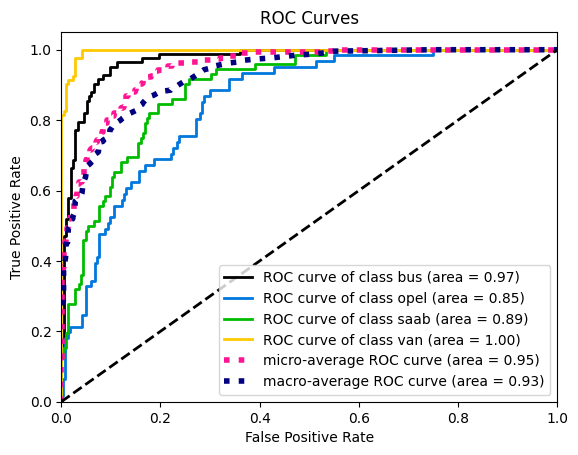

In [35]:
scikitplot.metrics.plot_roc(y_test, y_pred_proba)

#### 2.5. Decision tree
* Now train a desicion tree on the same data. Find optimal tree depth (`max_depth`) using cross-validation.

* Measure the model quality using the same metrics you used above.

In [53]:
X_train_pca.shape

(549, 12)

In [56]:
def process_data(pipe, X1, X2):
    X1_transformed = pipeline_norm.fit_transform(X1)
    X2_transformed = pipeline_norm.transform(X2)
    return X1_transformed, X2_transformed

In [59]:
X_train_norm, X_test_norm = process_data(pipeline_norm, X_train, X_test)
X_train_pca, X_test_pca = process_data(pipeline_norm, X_train, X_test)

In [61]:
from sklearn.tree import DecisionTreeClassifier
pipeline_pca = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=num_components))
])
pipeline_norm = Pipeline([
    ('scaler', StandardScaler()),
])

# X_train_norm = pipeline_norm.fit_transform(X_train)
# X_test_norm = pipeline_norm.transform(X_test)

# X_train_pca = pipeline_pca.fit_transform(X_train)
# X_test_pca = pipeline_pca.transform(X_test)


tree_params = {'criterion':['gini', 'entropy'],
              'splitter': ['best', 'random'],
              'max_depth': np.arange(2,50)}
cv = 5
seed = 42
tree_model = DecisionTreeClassifier(random_state=seed)

tree_vanilla, tree_tree_vanilla_score = get_best_model(X_train,
                                                       y_train, 
                                                       DecisionTreeClassifier(),
                                                       tree_params,
                                                       info='without transforms')

tree_norm, tree_norm_score = get_best_model(X_train_norm,
                                            y_train,
                                            DecisionTreeClassifier(),
                                            tree_params,
                                            info='with normalization')

tree_pca, tree_pca_score = get_best_model(X_train_pca,
                                          y_train,
                                          DecisionTreeClassifier(),
                                          tree_params,
                                          info='with normalization and PCA')


f1_vanilla, acc_vanilla = test_model(tree_vanilla,
                                     X_test,
                                     y_test,
                                     info='without transforms')

f1_norm, acc_norm = test_model(tree_norm, 
                               X_test_norm, 
                               y_test, 
                               info='with normalization')

f1_pca, acc_pca = test_model(tree_pca,
                             X_test_pca,
                             y_test,
                             info='with normalization and PCA')


# YOUR CODE HERE

Best without transforms train score: DecisionTreeClassifier(criterion='entropy', max_depth=6)
Best without transforms train estimator: 0.6995496246872392

Best with normalization train score: DecisionTreeClassifier(criterion='entropy', max_depth=6)
Best with normalization train estimator: 0.6958798999165972

Best with normalization and PCA train score: DecisionTreeClassifier(criterion='entropy', max_depth=6)
Best with normalization and PCA train estimator: 0.6958965804837364

F1 score without transforms : 0.731
Accuracy score without transforms : 0.744

F1 score with normalization : 0.73
Accuracy score with normalization : 0.744

F1 score with normalization and PCA : 0.709
Accuracy score with normalization and PCA : 0.734



Best without transforms train score: DecisionTreeClassifier(criterion='entropy', max_depth=32, splitter='random')
Best without transforms train estimator: 0.6941618015012511

Best with normalization train score: DecisionTreeClassifier(max_depth=8, splitter='random')
Best with normalization train estimator: 0.6958131776480402

Best with normalization and PCA train score: DecisionTreeClassifier(criterion='entropy', max_depth=10)
Best with normalization and PCA train estimator: 0.6613010842368641

F1 score without transforms : 0.694
Accuracy score without transforms : 0.71

F1 score with normalization : 0.668
Accuracy score with normalization : 0.68

F1 score with normalization and PCA : 0.639
Accuracy score with normalization and PCA : 0.657

Заметим:
- нормализация практически не влияет на качество классификации и модели-дерева 
- PCA вообще вредит

#### 2.6. Bagging.
Here starts the ensembling part.

First we will use the __Bagging__ approach. Build an ensemble of $N$ algorithms varying N from $N_{min}=2$ to $N_{max}=100$ (with step 5).

We will build two ensembles: of logistic regressions and of decision trees.

*Comment: each ensemble should be constructed from models of the same family, so logistic regressions should not be mixed up with decision trees.*


*Hint 1: To build a __Bagging__ ensebmle varying the ensemble size efficiently you might generate $N_{max}$ subsets of `train` data (of the same size as the original dataset) using bootstrap procedure once. Then you train a new instance of logistic regression/decision tree with optimal hyperparameters you estimated before on each subset (so you train it from scratch). Finally, to get an ensemble of $N$ models you average the $N$ out of $N_{max}$ models predictions.*

*Hint 2: sklearn might help you with this taks. Some appropriate function/class might be out there.*

* Plot `f1` and `accuracy` scores plots w.r.t. the size of the ensemble.

* Briefly analyse the plot. What is the optimal number of algorithms? Explain your answer.

* How do you think, are the hyperparameters for the decision trees you found in 2.5 optimal for trees used in ensemble? 

In [ ]:
# YOUR CODE HERE

#### 2.7. Random Forest
Now we will work with the Random Forest (its `sklearn` implementation).

* * Plot `f1` and `accuracy` scores plots w.r.t. the number of trees in Random Forest.

* What is the optimal number of trees you've got? Is it different from the optimal number of logistic regressions/decision trees in 2.6? Explain the results briefly.

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# YOUR CODE HERE

#### 2.8. Learning curve
Your goal is to estimate, how does the model behaviour change with the increase of the `train` dataset size.

* Split the training data into 10 equal (almost) parts. Then train the models from above (Logistic regression, Desicion Tree, Random Forest) with optimal hyperparameters you have selected on 1 part, 2 parts (combined, so the train size in increased by 2 times), 3 parts and so on.

* Build a plot of `accuracy` and `f1` scores on `test` part, varying the `train` dataset size (so the axes will be score - dataset size.

* Analyse the final plot. Can you make any conlusions using it? 

In [ ]:
# YOUR CODE HERE